In [51]:
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [52]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [53]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [54]:
for layer in resnet.layers:
    layer.trainable = False

In [55]:
folders = glob('Datasets/train/*')

In [56]:
x = Flatten()(resnet.output)

In [57]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

In [58]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [59]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [61]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [62]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [63]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Admin\Desktop\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 37s 18s/step - loss: 5.2258 - accuracy: 0.3125 - val_loss: 4.0870 - val_accuracy: 0.3966
Epoch 2/50
2/2 [==============================] - 19s 13s/step - loss: 9.1083 - accuracy: 0.2500 - val_loss: 2.5082 - val_accuracy: 0.5345
Epoch 3/50
2/2 [==============================] - 20s 14s/step - loss: 2.8357 - accuracy: 0.4531 - val_loss: 9.5158 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 23s 15s/step - loss: 7.1628 - accuracy: 0.3594 - val_loss: 10.3625 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 21s 15s/step - loss: 5.3615 - accuracy: 0.5000 - val_loss: 7.4128 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 21s 15s/step - loss: 4.3346 - accuracy: 0.3906 - val_loss: 1.2419 - val_accuracy: 0.5345
Epoch 7/50
2/2 [==============================] - 20s 14s/step - loss: 2.1240 - accuracy: 0.4688 - val_loss: 3.1962 - val_accuracy: 0.5345
Epoch 8/50
2/2 [==========

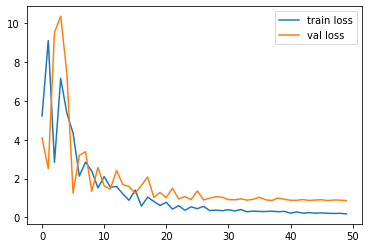

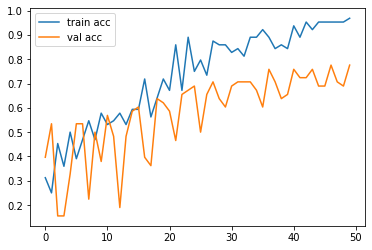

<Figure size 432x288 with 0 Axes>

In [64]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [65]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [66]:

y_pred = model.predict(test_set)

In [67]:
y_pred

array([[4.2804717e-03, 7.6070505e-01, 2.3501445e-01],
       [3.8532764e-02, 5.4504484e-01, 4.1642240e-01],
       [4.6466678e-02, 5.5509770e-01, 3.9843556e-01],
       [2.8841885e-02, 5.6723459e-03, 9.6548581e-01],
       [1.6675331e-01, 5.9805626e-01, 2.3519038e-01],
       [1.7959854e-02, 9.4763529e-01, 3.4404889e-02],
       [1.0563792e-05, 4.6903491e-03, 9.9529910e-01],
       [2.6827220e-02, 7.9267091e-01, 1.8050183e-01],
       [5.4593766e-03, 4.4744435e-01, 5.4709631e-01],
       [1.3867787e-01, 3.3560702e-01, 5.2571517e-01],
       [8.4445409e-02, 1.4844218e-01, 7.6711249e-01],
       [3.5314921e-02, 4.3346953e-01, 5.3121549e-01],
       [3.9536525e-02, 1.8927908e-02, 9.4153553e-01],
       [3.7367270e-05, 9.9849832e-01, 1.4643607e-03],
       [1.9662423e-01, 5.2049607e-01, 2.8287965e-01],
       [7.0234293e-01, 1.7154388e-02, 2.8050265e-01],
       [1.2651130e-02, 6.0692078e-01, 3.8042808e-01],
       [7.8604214e-02, 4.6568173e-01, 4.5571402e-01],
       [7.9709000e-04, 9.741

In [68]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [69]:
y_pred

array([1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1,
       1, 2, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 2, 1], dtype=int64)

In [70]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [71]:

model=load_model('model_resnet50.h5')


In [72]:

img=image.load_img('Datasets/Test/mercedes/28.jpg',target_size=(224,224))


In [73]:
x=image.img_to_array(img)
x

array([[[ 45.,  45.,  45.],
        [ 43.,  43.,  43.],
        [ 38.,  38.,  38.],
        ...,
        [217., 218., 236.],
        [218., 219., 237.],
        [218., 219., 237.]],

       [[ 45.,  45.,  45.],
        [ 43.,  43.,  43.],
        [ 38.,  38.,  38.],
        ...,
        [218., 219., 237.],
        [218., 219., 237.],
        [218., 219., 237.]],

       [[ 45.,  45.,  45.],
        [ 43.,  43.,  43.],
        [ 38.,  38.,  38.],
        ...,
        [218., 219., 237.],
        [218., 219., 237.],
        [218., 219., 237.]],

       ...,

       [[  9.,  10.,  14.],
        [  9.,  10.,  12.],
        [ 11.,  12.,  14.],
        ...,
        [ 39.,  40.,  45.],
        [ 39.,  40.,  45.],
        [ 39.,  40.,  45.]],

       [[  9.,  10.,  14.],
        [  9.,  10.,  12.],
        [ 11.,  12.,  14.],
        ...,
        [ 39.,  40.,  45.],
        [ 39.,  40.,  45.],
        [ 39.,  40.,  45.]],

       [[  9.,  10.,  15.],
        [  9.,  10.,  14.],
        [ 11.,  

In [74]:
x.shape

(224, 224, 3)

In [75]:
x=x/255

In [76]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [77]:
model.predict(img_data)

array([[0.02713892, 0.11610729, 0.85675377]], dtype=float32)

In [78]:
a=np.argmax(model.predict(img_data), axis=1)

In [79]:
a

array([2], dtype=int64)